#01 다층 퍼셉트론

## 간단하게 생각하기

XOR 연산 코드 작성해보자

In [1]:
import numpy as np
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

In [2]:
def MLP(x, w, b):
  y = np.sum(w * x) + b
  if y <= 0:
    return 0
  else:
    return 1

In [3]:
def NAND(x1, x2):
  return MLP(np.array([x1, x2]), w11, b1)
def OR(x1, x2):
  return MLP(np.array([x1, x2]), w12, b2)
def AND(x1, x2):
   return MLP(np.array([x1, x2]), w2, b3)
def XOR(x1, x2):
  return AND(NAND(x1, x2), OR(x1, x2))

In [4]:
if __name__ == '__main__':
  for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(x[0], x[1])
    print("입력값:" + str(x) + "출력값:" + str(y))

입력값:(0, 0)출력값:0
입력값:(1, 0)출력값:1
입력값:(0, 1)출력값:1
입력값:(1, 1)출력값:0


#02 활성화 함수


## 비선형 활성화 함수

계단 함수

In [6]:
def step(x):
  if x > 0.000001: return 1     # 부동 소수점 오차 방지
  else: return 0
# 넘파이 배열을 받기 위하여 변경
def step(x):
  result = x > 0.000001     # True 또는 False
  return result.astype(np.int)     # 정수로 반환

<ipython-input-6-898588b7208f>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return result.astype(np.int)     # 정수로 반환


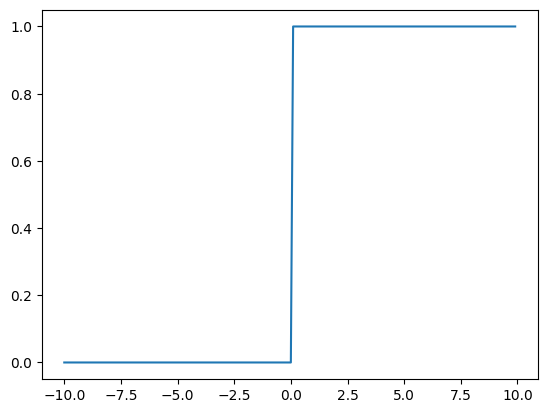

In [7]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-10.0, 10.0, 0.1)
y = step(x)
plt.plot(x, y)
plt.show()

Sigmoid 함수

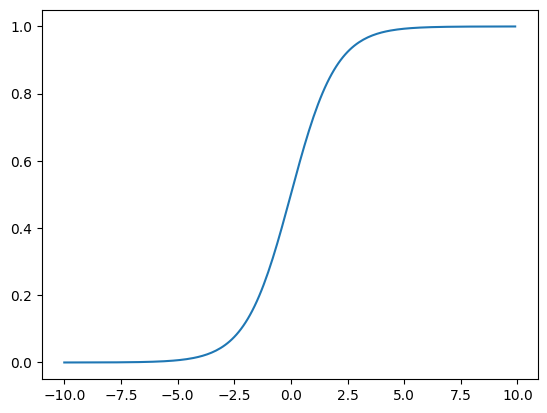

In [8]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))
x = np.arange(-10.0, 10.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)

Tanh 함수

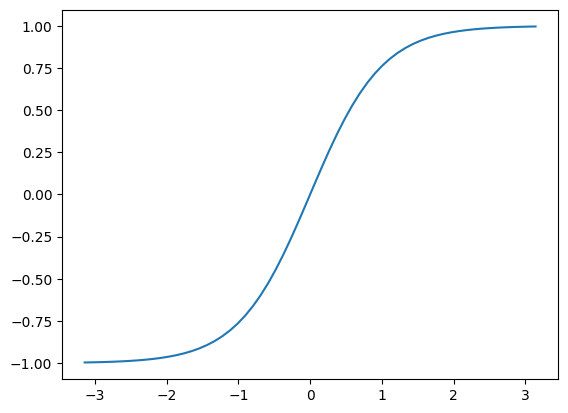

In [9]:
x = np.linspace(-np.pi, np.pi, 60)
y = np.tanh(x)
plt.plot(x, y)

ReLU 함수

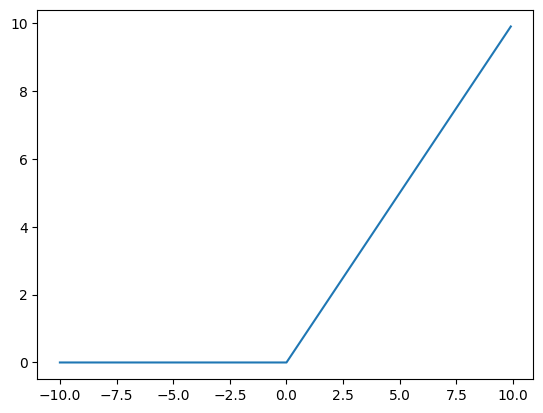

In [10]:
def relu(x):
  return np.maximum(x, 0)
x = np.arange(-10.0, 10.0, 0.1)
y = relu(x)
plt.plot(x, y)

#03 오차 역전파

##기존의 다층 퍼셉트론의 학습 원리

In [11]:
import numpy as np
def actf(x):     # 시그모이드 함수
  return 1 / (1 + np.exp(-x))
def actf_deriv(x):     # 시그모디으 함수의 미분치
  return x * (1 - x)
inputs, hiddens, outputs = 2, 2, 1     # 입력, 은닉, 출력 노드의 개수
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])     # 훈련 샘플
T = np.array([[0], [1], [1], [0]])     # 정답

In [12]:
W1 = np.array([[0.10, 0.20], [0.30, 0.40]])
W2 = np.array([[0.50], [0.60]])
B1 = np.array([0.1, 0.2])
B2 = np.array([0.3])
def predict(x):     # 순방향 전파 계산
  layer0 = x
  Z1 = np.dot(layer0, W1) + B1
  layer1 = actf(Z1)
  Z2 = np.dot(layer1, W2) + B2
  layer2 = actf(Z2)
  return layer0, layer1, layer2

In [13]:
def test():
  for x, y in zip(X, T):
    x = np.reshape(x, (1, -1))     # x를 2차원의 행렬로 구성 -> 입력은 반드시 2차원으로 구성
    layer0, layer1, layer2 = predict(x)
    print(x, y, layer2)
test()

[[0 0]] [0] [[0.70938314]]
[[0 1]] [1] [[0.72844306]]
[[1 0]] [1] [[0.71791234]]
[[1 1]] [0] [[0.73598705]]


## 다층 퍼셉트론의 학습 원리

오차 계산

In [14]:
y = np.array([0.0, 0.0, 0.8, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0])
target = np.array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
def MSE(target, y):
  return 0.5 * np.sum((y - target) ** 2)
MSE(target, y)

0.029999999999999992